In [17]:
# libraries
import os
import pandas as pd
import numpy as np
from time import time
from scipy.stats import kde
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt

data = np.load("mds_pos_pub8_k=16.npy")
df = pd.DataFrame({'x': data[:,0], 'y': data[:,1]})
  
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
nbins=300
k = kde.gaussian_kde([df.x,df.y])
xi, yi = np.mgrid[ df.x.min():df.x.max():nbins*1j, df.y.min():df.y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# Transform it in a dataframe
data=pd.DataFrame({'x': xi.flatten(), 'y': yi.flatten(), 'z': zi })
 
# Make the plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(data.x, data.y, data.z, cmap=plt.cm.Spectral, linewidth=0.2)
# Adapt angle, first number is up/down, second number is right/left

if not os.path.isdir("IMAGES"):
  os.mkdir("IMAGES")


for angle in range(0,360,5):
    time0 = time()
    ax.view_init(30, angle)
    while len(str(angle))<3:
        angle = "0" + str(angle)
    filename='IMAGES/2MDS'+str(angle)+'.png'
    plt.savefig(filename, dpi=150)
    plt.gca()
    print("one plot down - " + str(time()-time0))



KeyboardInterrupt: 

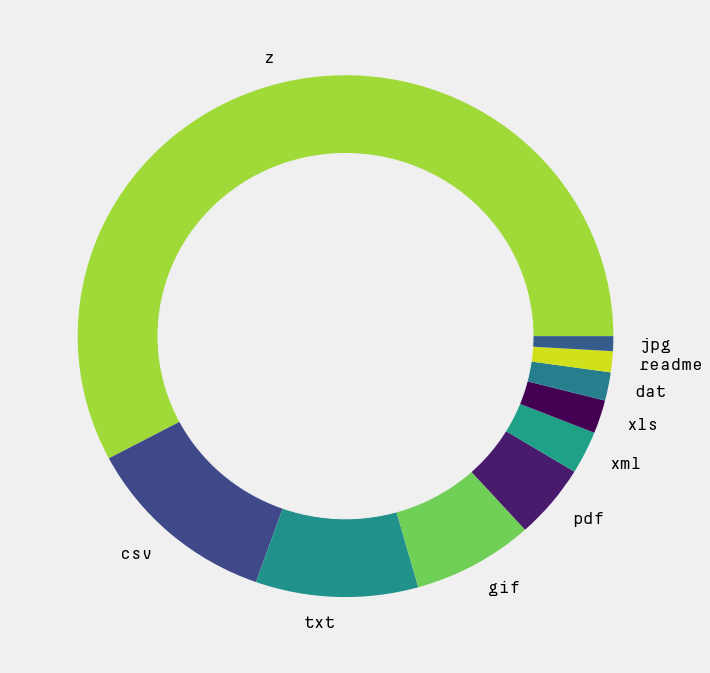

In [85]:
# library
import random
import palettable
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

background = "#F0F0F0"

# import fonts
prop = fm.FontProperties(fname='DecimaMonoPro.ttf') #tick labels
prop2 = fm.FontProperties(fname='apercu_medium_pro.otf') #title
prop3 = fm.FontProperties(fname='Apercu.ttf') #xlabel and ylabel
#prop4 = fm.FontProperties(fname='Apercu.ttf', size=legend_size) #legend

categories="z","csv","txt","gif","pdf","xml","xls","dat","readme","jpg",
data=[113425, 23200,19261, 14369, 9061, 5211, 4053, 3443, 2550, 1806]

#categories="csv","pdf","xml","xls","txt","readme","jpg","zip","doc","png"
#data=[5519,2666,1259,1163,1152,759,482,151,127,107]

donut = plt.figure(figsize=(12,12))
donut.patch.set_facecolor(background)
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color=background)

from palettable.matplotlib import Viridis_15
colors = Viridis_15.hex_colors
bolors = sorted(colors, key = lambda x: random.random() )
plt.pie(data, labels=categories, colors=bolors, textprops={'fontproperties': prop, 'fontsize':18})
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.savefig("pie2.svg", dpi=400)
plt.show()

